In [5]:
# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
!pip install urduhack[tf]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
# Read in the CSV file
df = pd.read_csv("Copy of Clean Translated Annotated Data 12000 data (1).csv")

In [8]:
df

,Sentence,Anger,Disgust,Fear,Sadness,Surprise,Happiness,Emotion Score
0,اس فلم کے بارے میں مجھے مارا کہ سب سے پہلی چیز...,0.0,0,1.0,0.0,0.0,0.0,3
1,اس فلم کے ساتھ ایک بھی بڑا مسئلہ کسی بھی موقع ...,0.0,1,0.0,0.0,0.0,0.0,2
2,ایک بہت غریب سکرپٹ، ایک بہت برا اداکار، اور ای...,1.0,1,0.0,0.0,0.0,0.0,7
3,قدرتی طور پر کہانی تیار کرنے میں بہت خیال رکھن...,0.0,0,0.0,0.0,1.0,1.0,11
4,اور شاندار ٹیکنیکلر میں فلمایا. ریس خود بہت سن...,0.0,0,0.0,0.0,1.0,0.0,5
...,...,...,...,...,...,...,...,...
11975,چھوٹے قد کی لڑکی اور شہد کی مکھی دونوں ہی بہت ...,0.0,0,0.0,1.0,0.0,0.0,4
11976,آپ جتنا سادہ ہو سکتے ہیں آپ یہ دیکھ کر حیران ر...,0.0,0,0.0,0.0,0.0,1.0,6
11977,صرف 2 دن جب کچھ نہیں کیا جا سکتا: کل اور کل۔ ا...,0.0,0,0.0,0.0,0.0,1.0,6
11978,شمالی آئرلینڈ میں کچھ بہترین نظارے ان لوگوں کو...,0.0,0,0.0,0.0,0.0,1.0,6


In [9]:

df = df.sample(frac = 1)




In [10]:
df

,Sentence,Anger,Disgust,Fear,Sadness,Surprise,Happiness,Emotion Score
7230,کچھ معیاری کرکٹ کی بدولت لیکن قسمت بھی,0.0,0,0.0,0.0,0.0,1.0,6
232,پلیز ندیم صعب ہمارے پرایم منسٹر سے کلیں کہ لفظ...,0.0,0,0.0,0.0,0.0,0.0,0
2500,عمران خان کو حکومت سے ہٹانے کے بعد جب زرداری س...,1.0,1,0.0,0.0,0.0,0.0,7
5960,اک دانش نورانی اک دانش برہانی ہے دانش برہانی ح...,0.0,0,0.0,0.0,1.0,0.0,5
7164,سچ میں یہ ٹیلی ویژن کے بہترین شوز میں سے ایک ہ...,0.0,0,0.0,0.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...
8949,پاکستان کو پہلے اندر سے غدار دشمنوں کا خاتمہ ک...,0.0,1,0.0,0.0,0.0,0.0,2
3390,سید شھداءامام حسین علیہ السلام کچھ لوگ رغبت کے...,0.0,0,0.0,0.0,0.0,1.0,6
3430,یہ ہےانکی کاردگی عدلیہ بھی حیرت زدہ ہے,0.0,1,0.0,0.0,0.0,0.0,2
6865,بہت ہی تازگی بخش ہارر فلم میں یقینی طور پر اس ...,0.0,0,1.0,0.0,0.0,0.0,3


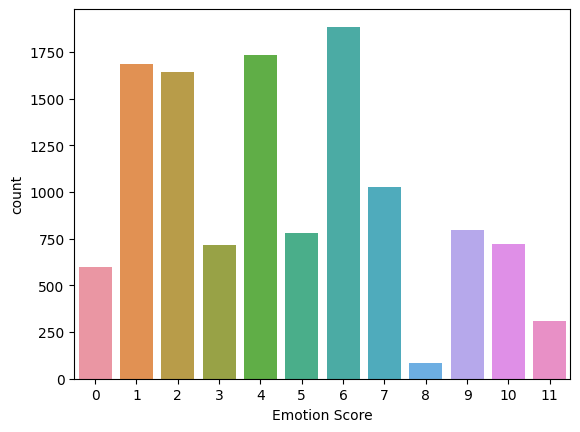

In [11]:
sns.countplot( x = 'Emotion Score', data = df );

In [12]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [13]:
df['Sentence'] = df['Sentence'].astype(str) # convert column to string type
df['Sentence'] = df['Sentence'].apply(normalize) # apply normalize function to column


In [14]:
df['Sentence'] = df['Sentence'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
# df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['Sentence'] = df['Sentence'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['Sentence'] = df['Sentence'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['Sentence'] = df['Sentence'].apply(replace_emails) # Replace all emails in text str with replace_with str.
# df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['Sentence'] = df['Sentence'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
# df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['Sentence'] = df['Sentence'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [15]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [17]:
len(STOP_WORDS)

430

In [16]:
df[['Sentence']].head(10)

,Sentence
7230,کچھ معیاری کرکٹ کی بدولت لیکن قسمت بھی
232,پلیز ندیم صعب ہمارے پرایم منسٹر سے کلیں کہ لفظ...
2500,عمران خان کو حکومت سے ہٹانے کے بعد جب زرداری س...
5960,اک دانش نورانی اک دانش برہانی ہے دانش برہانی ح...
7164,سچ میں یہ ٹیلی ویژن کے بہترین شوز میں سے ایک ہ...
9932,ہندوستان کے مسلمانوں ابھی وقت ہے اپنی آذادی چی...
4700,محبت کی فیلینگز بھی کیا ھیں یار کبھی کبھی ایسے...
2292,بھارت میں کووڈ نائنٹین اب تک کسی حقیقی بحران ک...
9106,بس مودی بس تیرا ظلم انتہا کو پہنچ گیا، کشمیری ...
3472,میں تو نیل پولش سے جوڑتا تھا کیونکہ جہاں نوٹوں...


In [18]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [19]:
df['Sentence'] =  df['Sentence'].apply(remove_stopwords)

In [20]:
df['lemmatized_text'] = df['Sentence'].apply(lemitizeStr)

In [21]:
df['Sentence'][2], df['lemmatized_text'][2]

('غریب سکرپٹ، برا اداکار، بری فلم', 'غریب سکرپٹ، برا اداکار، بری فلم ')

In [22]:
# Encode the labels
le = LabelEncoder()
le.fit(df['Emotion Score'])
df['encoded_sentiments'] = le.transform(df['Emotion Score'])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [24]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (8386,)
Shape of X_test (3594,)
Shape of Y_train (8386,)
Shape of Y_test (3594,)


In [25]:
max_feature_num = 500000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [26]:
# check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((8386, 14267), (3594, 14267))

#Machine Learning Models

In [25]:
#SVM with hyperparameter
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert train_vecs to list of strings
train_docs = [str(doc) for doc in train_vecs]

# Hyperparameter tuning
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', svm.LinearSVC())
])
parameters = {
    'svm__C': [0.1, 1, 10],
    'svm__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(train_docs, Y_train)
SVM = grid_search.best_estimator_

# Convert test_vecs to list of strings
test_docs = [str(doc) for doc in test_vecs]

# Testing
test_predictionSVM = SVM.predict(test_docs)
print(classification_report(test_predictionSVM, Y_test))
print(confusion_matrix(test_predictionSVM, Y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local

              precision    recall  f1-score   support

           0       0.17      0.56      0.26        55
           1       0.35      0.33      0.34       554
           2       0.45      0.36      0.40       610
           3       0.48      0.35      0.41       303
           4       0.42      0.39      0.41       541
           5       0.49      0.39      0.43       273
           6       0.74      0.46      0.57       906
           7       0.26      0.37      0.31       224
           8       0.00      0.00      0.00         0
           9       0.14      0.36      0.20        95
          10       0.08      0.55      0.15        33
          11       0.00      0.00      0.00         0

    accuracy                           0.39      3594
   macro avg       0.30      0.34      0.29      3594
weighted avg       0.48      0.39      0.42      3594

[[ 31   0   1   8   1   1   7   0   0   6   0   0]
 [ 10 183 181  17  39  11  15  62   5  17   9   5]
 [ 14 208 219  18  39   9  13  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#SVM
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [25]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM CLASSIFIER on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of SVM CLASSIFIER on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.21      0.37      0.27       107
           1       0.34      0.32      0.33       517
           2       0.40      0.35      0.37       557
           3       0.42      0.38      0.40       224
           4       0.40      0.37      0.39       544
           5       0.37      0.35      0.36       262
           6       0.62      0.48      0.54       734
           7       0.31      0.32      0.32       287
           8       0.09      0.60      0.15         5
           9       0.22      0.33      0.26       172
          10       0.21      0.29      0.25       158
          11       0.05      0.19      0.08        27

    accuracy                           0.37      3594
   macro avg       0.30      0.36      0.31      3594
weighted avg       0.40      0.37      0.38      3594

[[ 40   7   2  11  14   4  14   3   0   6   5   1]
 [ 12 168 164   9  45  20  21  40 

In [27]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [28]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.18      0.55      0.27        60
           1       0.38      0.33      0.35       613
           2       0.41      0.33      0.36       618
           3       0.36      0.41      0.39       197
           4       0.46      0.36      0.41       631
           5       0.43      0.43      0.43       220
           6       0.73      0.48      0.58       865
           7       0.26      0.37      0.31       227
           8       0.00      0.00      0.00         0
           9       0.15      0.37      0.21        98
          10       0.15      0.49      0.23        65
          11       0.00      0.00      0.00         0

    accuracy                           0.39      3594
   macro avg       0.29      0.34      0.29      3594
weighted avg       0.47      0.39      0.41      3594

[[ 33   0   1  11   1   1   7   0   0   5   0   1]
 [ 12 200 199  19 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [29]:
#LR WITH HYPERPARAMETER
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize logistic regression model
LR = LogisticRegression(C=1.0, penalty='l2')

# Fit model on training data
LR.fit(train_vecs, Y_train)

# Predict labels for test data
test_predictionLR = LR.predict(test_vecs)

# Evaluate performance using classification report and confusion matrix
class_report = classification_report(Y_test, test_predictionLR)
conf_matrix = confusion_matrix(Y_test, test_predictionLR)

print('Results of Logistic Regression Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Results of Logistic Regression Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.55      0.18      0.27       184
           1       0.33      0.38      0.35       522
           2       0.33      0.41      0.36       489
           3       0.41      0.36      0.39       222
           4       0.36      0.46      0.41       502
           5       0.43      0.43      0.43       220
           6       0.48      0.73      0.58       567
           7       0.37      0.26      0.31       317
           8       0.00      0.00      0.00        22
           9       0.37      0.15      0.21       246
          10       0.49      0.15      0.23       213
          11       0.00      0.00      0.00        90

    accuracy                           0.39      3594
   macro avg       0.34      0.29      0.29      3594
weighted avg       0.39      0.39      0.37      3594

[[ 33  12  17  18  37   6  48   8   0   2   3   0]
 [  0 200 215   5 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test)

# Example usage
class_report, conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier\n')
print(class_report)
print(conf_matrix)


Results of Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.21      0.45      0.29        86
           1       0.00      0.00      0.00         0
           2       0.90      0.23      0.36      1939
           3       0.40      0.26      0.31       338
           4       0.28      0.55      0.37       253
           5       0.37      0.38      0.37       213
           6       0.31      0.51      0.38       342
           7       0.28      0.25      0.27       358
           8       0.00      0.00      0.00         0
           9       0.04      0.61      0.08        18
          10       0.09      0.45      0.15        42
          11       0.01      0.20      0.02         5

    accuracy                           0.30      3594
   macro avg       0.24      0.32      0.22      3594
weighted avg       0.63      0.30      0.35      3594

[[ 39   5   4  18   9   1   6   0   0   0   3   1]
 [  0   0   0   0   0   0   0   0   0   0   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Define the parameter grid to search
    param_grid = {'max_depth': [5, 10, 15],
                  'min_samples_split': [2, 5, 10]}

    # Create a Decision Tree Classifier object
    DT = DecisionTreeClassifier(random_state=23)

    # Perform grid search cross-validation to find the best hyperparameters
    clf = GridSearchCV(DT, param_grid, cv=5)
    clf.fit(train_vecs, Y_train)

    # Print the best hyperparameters and the corresponding accuracy
    print("Best hyperparameters: ", clf.best_params_)
    print("Best score: ", clf.best_score_)

    # Use the best hyperparameters to train the model
    DT = DecisionTreeClassifier(random_state=23, **clf.best_params_)
    DT.fit(train_vecs, Y_train)

    # Test the model and print the classification report and confusion matrix
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test)

class_report, conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Best hyperparameters:  {'max_depth': 15, 'min_samples_split': 10}
Best score:  0.3280466352950207
Results of Decision Tree Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.17      0.53      0.26        58
           1       0.07      0.36      0.12       107
           2       0.80      0.24      0.37      1642
           3       0.30      0.38      0.33       174
           4       0.35      0.36      0.36       489
           5       0.45      0.38      0.41       258
           6       0.35      0.52      0.41       378
           7       0.16      0.20      0.18       251
           8       0.00      0.00      0.00         2
           9       0.21      0.28      0.24       179
          10       0.12      0.50      0.20        52
          11       0.01      0.25      0.02         4

    accuracy                           0.31      3594
   macro avg       0.25      0.33      0.24      3594
weighted avg       0.53      0.3

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Define decision tree model
    DT = DecisionTreeClassifier(random_state=23)

    # Define parameter grid for grid search
    param_grid = {'max_depth': [3, 5, 7, 9],
                  'min_samples_split': [2, 5, 10],
                  'criterion': ['gini', 'entropy']}

    # Perform grid search
    grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)
    grid_search.fit(train_vecs, Y_train)

    # Get best model
    best_DT_model = grid_search.best_estimator_

    # Make predictions on test set
    test_predictionDT = best_DT_model.predict(test_vecs)

    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test)

# Call DT classifier function
class_report, conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)

# Print results
print('Results of Decision Tree Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Results of Decision Tree Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.22      0.41      0.29       100
           1       0.00      0.00      0.00         5
           2       0.91      0.24      0.37      1884
           3       0.30      0.35      0.32       193
           4       0.23      0.51      0.32       228
           5       0.45      0.37      0.41       269
           6       0.27      0.51      0.35       297
           7       0.27      0.25      0.26       347
           8       0.00      0.00      0.00         0
           9       0.24      0.29      0.26       207
          10       0.07      0.25      0.11        61
          11       0.01      0.33      0.02         3

    accuracy                           0.30      3594
   macro avg       0.25      0.29      0.23      3594
weighted avg       0.61      0.30      0.34      3594

[[ 41   7   2  18  15   4   6   0   0   1   5   1]
 [  0   0   1   1   0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
def XGB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
    XGB.fit(train_vecs, Y_train)

    # Testing
    test_predictionXGB = XGB.predict(test_vecs)
    return classification_report(test_predictionXGB, Y_test), confusion_matrix(test_predictionXGB, Y_test)  

In [34]:
class_report , conf_matrix = XGB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Xgboost Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Xgboost Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.09      0.64      0.15        25
           1       0.49      0.24      0.32      1052
           2       0.34      0.34      0.34       484
           3       0.23      0.61      0.34        85
           4       0.40      0.37      0.39       547
           5       0.40      0.42      0.41       212
           6       0.69      0.38      0.49      1040
           7       0.14      0.51      0.21        85
           8       0.00      0.00      0.00         0
           9       0.09      0.63      0.16        35
          10       0.07      0.54      0.12        28
          11       0.01      1.00      0.02         1

    accuracy                           0.35      3594
   macro avg       0.25      0.47      0.25      3594
weighted avg       0.48      0.35      0.38      3594

[[ 16   1   1   1   0   0   3   1   0   2   0   0]
 [ 31 255 252  43 106  42  99 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

In [36]:
class_report , conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Random Forest Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.28      0.33      0.30       409
           2       0.24      0.44      0.31       262
           3       0.00      0.33      0.01         3
           4       0.37      0.39      0.38       479
           5       0.00      0.00      0.00         0
           6       0.93      0.22      0.35      2417
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.07      0.90      0.14        21
          10       0.01      1.00      0.03         3
          11       0.00      0.00      0.00         0

    accuracy                           0.28      3594
   macro avg       0.16      0.30      0.13      3594
weighted avg       0.73      0.28      0.35      3594

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  5 137 147   8  35  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
 #ENSEMBLE LEARNING
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create base classifiers
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
gb = GradientBoostingClassifier(n_estimators=500, max_depth=20, random_state=42)
dt = DecisionTreeClassifier()

# Create meta classifier
meta = DecisionTreeClassifier()

# Create ensemble classifier with stacking
ensemble = StackingClassifier(estimators=[('rf', rf), ('gb', gb)], final_estimator=meta)

# Fit the ensemble classifier on the training data
ensemble.fit(train_vecs, Y_train)

# Make predictions on the test data
test_prediction = ensemble.predict(test_vecs)

# Evaluate the performance of the ensemble classifier
class_report = classification_report(test_prediction, Y_test)
conf_matrix = confusion_matrix(test_prediction, Y_test)

# Print results
print('Results of Ensemble Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


In [35]:
from sklearn.ensemble import RandomForestClassifier

def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

class_report, conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Results of Random Forest Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.28      0.31      0.30       475
           2       0.38      0.37      0.38       507
           3       0.10      0.82      0.18        28
           4       0.45      0.33      0.38       691
           5       0.12      0.45      0.19        58
           6       0.88      0.28      0.43      1785
           7       0.05      0.60      0.09        25
           8       0.00      0.00      0.00         0
           9       0.06      0.88      0.11        17
          10       0.03      0.88      0.06         8
          11       0.00      0.00      0.00         0

    accuracy                           0.32      3594
   macro avg       0.20      0.41      0.18      3594
weighted avg       0.62      0.32      0.38      3594

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  7 148 143  21  28  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

NameError: ignored

SyntaxError: ignored

StopWordError: ignored

NameError: ignored

In [54]:
# Make copy of Dataset to prepare for Word2Vector
df_w2v = df.copy() 

In [55]:
df_w2v.head()

,Sentence,Anger,Disgust,Fear,Sadness,Surprise,Happiness,Emotion Score,lemmatized_text,encoded_sentiments
2762,گیند جادوگر بلے گیم چینجر,0.0,0,0.0,0.0,0.0,1.0,6,گیند جادوگر بلے گیم چینجر,6
1783,روح پیاسی اداسی مرشد,0.0,0,0.0,1.0,1.0,0.0,10,روح پیاسی اداسی مرشد,10
1852,مرد ڈر حالات خونی منظر سےجس حال جینا مشکل حال ...,0.0,0,0.0,0.0,0.0,1.0,6,مرد ڈر حالات خونی منظر سےجس حال جینا مشکل حال ...,6
5580,اشک ناداں کہو پچھتائیں گے گر آنکھوں گے گے چھین...,0.0,0,1.0,1.0,0.0,0.0,9,اشک ناداں کہو پچھتائیں گے گر آنکھوں گے گے چھین...,9
6083,یاد یاد دن ٹرین قصہ سنایا,0.0,0,0.0,0.0,0.0,1.0,6,یاد یاد دن ٹرین قصہ سنایا,6


In [56]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatized_text"].apply(tokenizer)

In [60]:
import gensim
model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], vector_size=128, window=5, workers=10, min_count = 1)

In [61]:
model_word2vec.wv.most_similar("مرد")

[('دیکھ', 0.9996129274368286),
 ('جان', 0.9995877742767334),
 ('چھوڑ', 0.9995824098587036),
 ('بس', 0.9995759129524231),
 ('سو', 0.9995571970939636),
 ('لوگ', 0.9995548725128174),
 ('دنیا', 0.9995483160018921),
 ('ماں', 0.9995458126068115),
 ('بہن', 0.9995432496070862),
 ('ھے', 0.999540388584137)]

In [62]:
VOCAB_SIZE = len(model_word2vec.wv.index_to_key)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [63]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(17577, 128, 42)

In [64]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [75]:
import numpy as np
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

5641 rss
8763 tv
9441 you
9664 uncles
9716 کوئgirl
9717 edit
9755 coapکادماغ
9789 cm
11793 un
12444 ptm
12485 mns
13285 t20
13517 brexit
13586 pta
14119 ludo
14142 l
14766 شاہینiii
15006 ghq
15122 inshaallah


In [76]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [77]:
train_label = df_w2v.encoded_sentiments

In [78]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [79]:
train_label.nunique()

12

In [70]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

#Deep Learning Models

In [71]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu", padding ="same"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(256, 5, activation="relu", padding ="same"))

model.add(Layers.Conv1D(128, 5, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 3, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(1))

model.add(Layers.Conv1D(32, 3, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 128)           2249984   
                                                                 
 conv1d (Conv1D)             (None, 42, 512)           328192    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 512)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 256)            655616    
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 128)            163968    
                                                                 
 dropout (Dropout)           (None, 8, 128)            0         
                                                        

In [72]:
CONV_NET = model.fit( train_sentences, train_tags, epochs=10, validation_split=0.20 )

Epoch 1/10
240/240 [==============================] - 38s 147ms/step - loss: -4489663741952.0000 - accuracy: 0.1423 - val_loss: -38844204318720.0000 - val_accuracy: 0.1414
Epoch 2/10
240/240 [==============================] - 31s 130ms/step - loss: -4001923019571200.0000 - accuracy: 0.1440 - val_loss: -15384266837852160.0000 - val_accuracy: 0.1414
Epoch 3/10
240/240 [==============================] - 32s 135ms/step - loss: -158431258966228992.0000 - accuracy: 0.1440 - val_loss: -375993050683408384.0000 - val_accuracy: 0.1414
Epoch 4/10
240/240 [==============================] - 32s 133ms/step - loss: -1688736610566275072.0000 - accuracy: 0.1440 - val_loss: -3079383249336664064.0000 - val_accuracy: 0.1414
Epoch 5/10
240/240 [==============================] - 31s 127ms/step - loss: -9616515613505617920.0000 - accuracy: 0.1440 - val_loss: -14620456803188604928.0000 - val_accuracy: 0.1414
Epoch 6/10
240/240 [==============================] - 31s 127ms/step - loss: -36928615344903290880.000

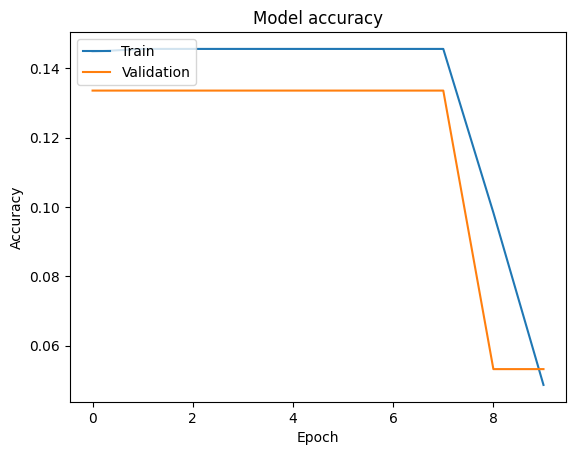

In [50]:
plt.plot(CONV_NET.history['accuracy'])
plt.plot(CONV_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

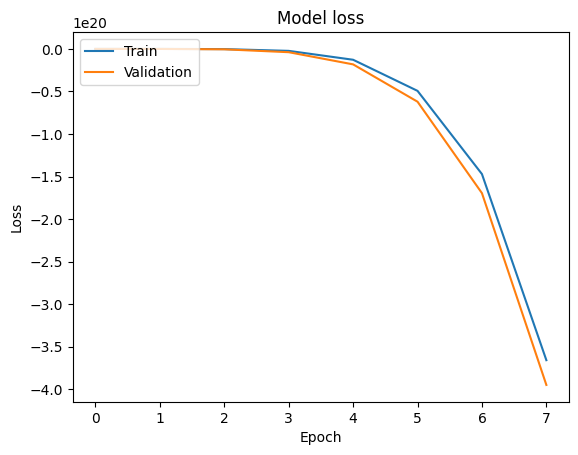

In [51]:
plt.plot(CONV_NET.history['loss'])
plt.plot(CONV_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
y_pred = np.argmax(model.predict(test_sentences), axis=1)
y_true = np.argmax(tf.keras.utils.to_categorical(test_tags, NUM_CLASSES), axis=1)
print(classification_report(y_true, y_pred))

#print(classification_report(model.predict(test_sentences).round(), test_tags))

75/75 [==============================] - 4s 47ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.20      0.71      0.32       365
           2       0.00      0.00      0.00       285
           3       0.00      0.00      0.00       131
           4       0.18      0.36      0.24       346
           5       0.00      0.00      0.00       164
           6       0.28      0.30      0.29       395
           7       0.00      0.00      0.00       199
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00       171
          10       0.00      0.00      0.00       155
          11       0.00      0.00      0.00        62

    accuracy                           0.21      2396
   macro avg       0.05      0.11      0.07      2396
weighted avg       0.10      0.21      0.13      2396



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu", padding ="same"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(256, 5, activation="relu", padding ="same"))

model.add(Layers.Conv1D(128, 5, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 3, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(1))

model.add(Layers.Conv1D(32, 3, activation="relu", padding ="same"))
model.add(Layers.Dropout(0.3))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(12,activation='softmax'))

model.summary()

model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 42, 128)           2249984   
                                                                 
 conv1d_10 (Conv1D)          (None, 42, 512)           328192    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 8, 512)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 8, 256)            655616    
                                                                 
 conv1d_12 (Conv1D)          (None, 8, 128)            163968    
                                                                 
 dropout_8 (Dropout)         (None, 8, 128)            0         
                                                      

In [90]:
from keras.utils import to_categorical
# Get all unique tags in the dataset
tags = list(set(tag for doc in train_data for tag in doc[1]))

# Define tag2idx dictionary
tag2idx = {t: i for i, t in enumerate(tags)}

# Convert the tags to one-hot encoded vectors
num_classes = len(tags)
train_tags_one_hot = to_categorical(train_tags, num_classes=num_classes)
test_tags_one_hot = to_categorical(test_tags, num_classes=num_classes)

# Define tag2idx dictionary
tag2idx = {t: i for i, t in enumerate(tags)}

# Convert the tags to one-hot encoded vectors
num_classes = len(tag2idx)
train_tags_one_hot = to_categorical(train_tags, num_classes=num_classes)
test_tags_one_hot = to_categorical(test_tags, num_classes=num_classes)

# Compile the model with the categorical cross-entropy loss function
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
history = model.fit(train_sentences, train_tags_one_hot, epochs=10, batch_size=32)

# Evaluate the model
print(classification_report(np.argmax(model.predict(test_sentences), axis=-1), np.argmax(test_tags_one_hot, axis=-1)))

#CONV_NET = model.fit( train_sentences, train_tags, epochs=10, validation_split=0.20 )

NameError: ignored

In [91]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 42, 128)           2249984   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              788480    
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                      

In [92]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
 

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3) 
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
240/240 [==============================] - 80s 316ms/step - loss: -56.9509 - accuracy: 0.1402 - val_loss: -87.5351 - val_accuracy: 0.1288
Epoch 2/10
240/240 [==============================] - 70s 292ms/step - loss: -113.3547 - accuracy: 0.1403 - val_loss: -143.4803 - val_accuracy: 0.1288
Epoch 3/10
240/240 [==============================] - 70s 293ms/step - loss: -167.6944 - accuracy: 0.1403 - val_loss: -198.9536 - val_accuracy: 0.1288
Epoch 4/10
240/240 [==============================] - 70s 293ms/step - loss: -222.6806 - accuracy: 0.1403 - val_loss: -254.4250 - val_accuracy: 0.1288
Epoch 5/10
240/240 [==============================] - 70s 292ms/step - loss: -277.1568 - accuracy: 0.1403 - val_loss: -309.8084 - val_accuracy: 0.1288
Epoch 6/10
240/240 [==============================] - 71s 296ms/step - loss: -330.5371 - accuracy: 0.1403 - val_loss: -364.9746 - val_accuracy: 0.1288
Epoch 7/10
240/240 [==============================] - 71s 295ms/step - loss: -385.1757 - accurac

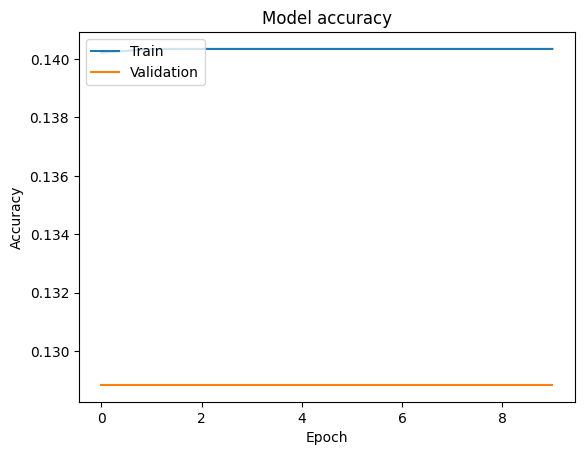

In [93]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

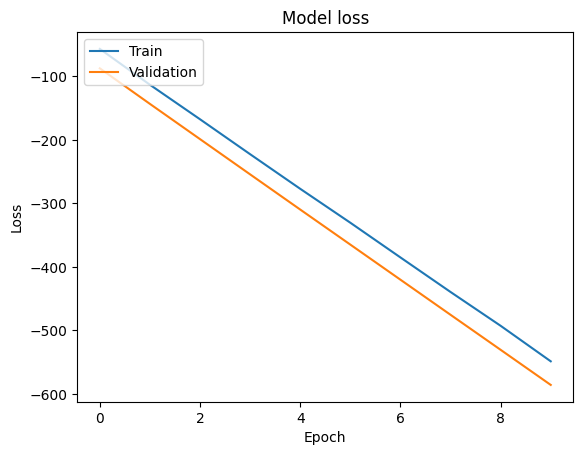

In [94]:
plt.plot(LSTM_NET.history['loss'])
plt.plot(LSTM_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [95]:
print(classification_report(lstm.predict(test_sentences).round(), test_tags))

75/75 [==============================] - 6s 66ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.15      0.26      2396
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0

    accuracy                           0.15      2396
   macro avg       0.08      0.01      0.02      2396
weighted avg       1.00      0.15      0.26      2396



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, LSTM, Concatenate, Dense, Dropout

# define the number of classes
num_classes = 9

# define the maximum length of the input sequences
max_length = 100

# define the size of the embedding vector
embedding_size = 128

# define the size of the LSTM layer
lstm_size = 64

# define the size of the dense layer
dense_size = 32

# define the dropout rate
dropout_rate = 0.2

# create the input layer
input_layer = Input(shape=(max_length,), dtype='int32')

# create the embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length)(input_layer)

# apply spatial dropout to the embedding layer
embedding_layer = SpatialDropout1D(rate=dropout_rate)(embedding_layer)

# create the bidirectional LSTM layer
lstm_layer = Bidirectional(LSTM(units=lstm_size, dropout=dropout_rate, recurrent_dropout=dropout_rate))(embedding_layer)

# create the dense layer
dense_layer = Dense(units=dense_size, activation='relu')(lstm_layer)

# apply dropout to the dense layer
dense_layer = Dropout(rate=dropout_rate)(dense_layer)

# create the output layer
output_layer = Dense(units=num_classes, activation='softmax')(dense_layer)

# create the model
model = Model(inputs=input_layer, outputs=output_layer)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


NameError: ignored

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, LSTM, Concatenate, Dense, Dropout

# define the number of classes
num_classes = 3

# define the maximum length of the input sequences
max_length = 500

# define the size of the embedding vector
embedding_size = 128

# define the size of the LSTM layer
lstm_size = 64

# define the size of the dense layer
dense_size = 32

# define the dropout rate
dropout_rate = 0.2

# define the size of the vocabulary used in the input text data
vocab_size = 10000

# create the input layer
input_layer = Input(shape=(500,), dtype='int32')

# create the embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length)(input_layer)

# apply spatial dropout to the embedding layer
embedding_layer = SpatialDropout1D(rate=dropout_rate)(embedding_layer)

# create the bidirectional LSTM layer
lstm_layer = Bidirectional(LSTM(units=lstm_size, dropout=dropout_rate, recurrent_dropout=dropout_rate))(embedding_layer)

# create the dense layer
dense_layer = Dense(units=dense_size, activation='relu')(lstm_layer)

# apply dropout to the dense layer
dense_layer = Dropout(rate=dropout_rate)(dense_layer)

# create the output layer
output_layer = Dense(units=num_classes, activation='softmax')(dense_layer)

# create the model
model = Model(inputs=input_layer, outputs=output_layer)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(train_vecs, Y_train, validation_data=(test_vecs, Y_test), epochs=10, batch_size=32)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


NameError: ignored

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("Copy of Clean Translated Annotated Data 12000 data (1).csv")

# Split the data into training and testing sets
train_data = data[:700]
test_data = data[700:]

# Preprocess the text data
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data["Sentence"])
test_features = vectorizer.transform(test_data["Sentence"])

# Train the classifier
clf = MultinomialNB()
clf.fit(train_features, train_data["Emotion Score"])

# Test the classifier
predictions = clf.predict(test_features)
accuracy = accuracy_score(test_data["emotion"], predictions)
report = classification_report(test_data["emotion"], predictions)

# Print the results
print("Accuracy: ", accuracy)
print(report)


ValueError: ignored